In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('gfswave.20210826.t12z.atlocn.0p16.f000.grib2', engine='gribberish')
ds

<xarray.Dataset>
Dimensions:  (time: 1, lat: 331, lon: 301)
Coordinates:
  * time     (time) datetime64[ns] 2021-08-26T08:00:00
  * lat      (lat) float64 55.0 54.83 54.67 54.5 ... 0.3332 0.1666 -0.00011
  * lon      (lon) float64 260.0 260.2 260.3 260.5 ... 309.5 309.7 309.8 310.0
Data variables: (12/13)
    WDIR     (time, lat, lon) float64 ...
    WIND     (time, lat, lon) float64 ...
    SWPER    (time, lat, lon) float64 ...
    SWDIR    (time, lat, lon) float64 ...
    SWELL    (time, lat, lon) float64 ...
    DIRPW    (time, lat, lon) float64 ...
    ...       ...
    WVDIR    (time, lat, lon) float64 ...
    UGRD     (time, lat, lon) float64 ...
    WVPER    (time, lat, lon) float64 ...
    VGRD     (time, lat, lon) float64 ...
    HTSGW    (time, lat, lon) float64 ...
    PERPW    (time, lat, lon) float64 ...
Attributes:
    meta:     created with gribberish
    crs:      GEOGCS["unknown",DATUM["unknown",SPHEROID["unknown",6367470,0]]...

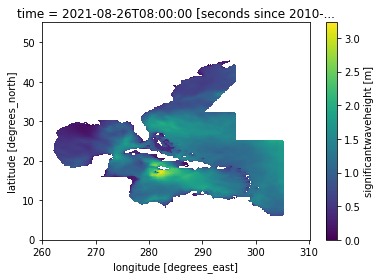

In [3]:
%matplotlib inline
ds['HTSGW'].plot()